NAMA : REZA PUTRI ANGGA
NPM : 22083010006
MATA KULIAH : ANALISIS DATA EKSPLORATIF (A)

# PENYAJIAN DATA MENGGUNAKAN BERBAGAI BENTUK DIAGRAM

1. Daftar Dosen UPN "Veteran" X Angkatan 2022

Melakukan Pembuatan Data Frame Dari Data Yang Ada

In [1]:
#penggunaan library pandas untuk membuat dataframe
import pandas as pd 

#penulisan data untuk dataframe
DataDosen = {"Nomor" : list(range(1, 21)),
             "Tanggal Lahir Dosen" : ["1 Mei 1993", "8 September 1992", "4 Agustus 1978", "1 Januari 1980", 
                                      "16 April 1995", "19 Maret 1991", "23 November 1994", "25 Februari 1997", 
                                      "20 Oktober 1991", "18 November 1997", "11 Mei 1992", "12 Juni 1982", "11 Juli 1979", 
                                      "16 Agustus 1977", "2 November 1970", "8 Desember 1983", "22 Maret 1992", "10 April 1994", 
                                      "12 Mei 1996", "11 April 1993"],
            "Pendidikan Terakhir Dosen" : ["S2 Terapan Teknik Informatika, Politeknik Elektronika Negeri Surabaya", 
                                           "S2 Teknik Informatika, Institut Teknologi Sepuluh Nopember", 
                                           "S3 Biomedical Engineering, University of Rome", 
                                           "S3 Informatics, University of WDafashington", 
                                           "S3 Biomedik, Institut Teknologi Sepuluh Nopember", 
                                           "S3 Informatika, Universitas Telkom", 
                                           "S2 Terapan Teknik Elektronika, Politeknik Elektronika Negeri Surabaya", 
                                           "S1 Electronical Engineering, University of Manchester", 
                                           "S3 Informatics, University of Nigeria", "S1 Biomedik, Universitas Indonesia", 
                                           "S3 Teknik Elektro, Institut Teknologi Sepuluh Nopember", 
                                           "Post-doctoral Biomedical Engineering, Pusan National University", 
                                           "Post-doctoral Electronical Engineering, Hongkong University", 
                                           "Post-doctoral Biomedical Engineering, Sydney University", 
                                           "Post-doctoral Informatics, Institut Teknologi Bandung", 
                                           "S3 Sistem Informasi, Institut Teknologi Sepuluh Nopember", 
                                           "S2 Teknik Informatika, Universitas Padjadjaran", 
                                           "S2 Teknik Elektro, Universitas Gadjah Mada", 
                                           "S2 Teknik Biomedik, Universitas Airlangga", 
                                           "S2 Teknik Informatika, Universitas Bina Darma"]}

dfs = pd.DataFrame(DataDosen)
print("Di Tampilkan Data Frame Dari Daftar Data Dosen UPN 'Veteran' :")
dfs

Di Tampilkan Data Frame Dari Daftar Data Dosen UPN 'Veteran' :


,Nomor,Tanggal Lahir Dosen,Pendidikan Terakhir Dosen
0,1,1 Mei 1993,"S2 Terapan Teknik Informatika, Politeknik Elek..."
1,2,8 September 1992,"S2 Teknik Informatika, Institut Teknologi Sepu..."
2,3,4 Agustus 1978,"S3 Biomedical Engineering, University of Rome"
3,4,1 Januari 1980,"S3 Informatics, University of WDafashington"
4,5,16 April 1995,"S3 Biomedik, Institut Teknologi Sepuluh Nopember"
5,6,19 Maret 1991,"S3 Informatika, Universitas Telkom"
6,7,23 November 1994,"S2 Terapan Teknik Elektronika, Politeknik Elek..."
7,8,25 Februari 1997,"S1 Electronical Engineering, University of Man..."
8,9,20 Oktober 1991,"S3 Informatics, University of Nigeria"
9,10,18 November 1997,"S1 Biomedik, Universitas Indonesia"


Melakukan Pengelompokkan Data Dosen Berdasarkan Jenjang Pendidikan Dosen, Program Studi Dosen, Dan Usia Dosen

In [2]:
#penggunaan library datetime untuk tanggal lahir dan locale untuk mengatur format
from datetime import datetime
import locale

#mengubah kolom tanggal lahir dosen
locale.setlocale(locale.LC_TIME, "id_ID.UTF8")
dfs["Tanggal Lahir Dosen"] = pd.to_datetime(dfs["Tanggal Lahir Dosen"], format = "%d %B %Y", errors = "coerce")

#menambakan kolom jenjang pendidikan
dfs["Jenjang Pendidikan Dosen"] = dfs["Pendidikan Terakhir Dosen"].str.extract(r'(S\d|Post-doctoral)')[0]

#menambahkan kolom bidang studi dosen
dfs["Program Studi Dosen"] = dfs["Pendidikan Terakhir Dosen"].str.replace(r'(S\d|Post-doctoral)','', regex = False).str.split(',').str[0].str.strip()
dfs["Kampus Dosen"] = dfs["Pendidikan Terakhir Dosen"].str.replace(r'(S\d|Post-doctoral)', '', regex = False).str.split(',').str[1].str.strip()

#menambahkan kolom usia dosen
dfs["Usia Dosen"] = (datetime.now() - dfs["Tanggal Lahir Dosen"]).astype("<m8[Y]")
dfs["Usia Dosen"] = dfs["Usia Dosen"].astype(int)
dfs

,Nomor,Tanggal Lahir Dosen,Pendidikan Terakhir Dosen,Jenjang Pendidikan Dosen,Program Studi Dosen,Kampus Dosen,Usia Dosen
0,1,1993-05-01,"S2 Terapan Teknik Informatika, Politeknik Elek...",S2,S2 Terapan Teknik Informatika,Politeknik Elektronika Negeri Surabaya,30
1,2,1992-09-08,"S2 Teknik Informatika, Institut Teknologi Sepu...",S2,S2 Teknik Informatika,Institut Teknologi Sepuluh Nopember,31
2,3,1978-08-04,"S3 Biomedical Engineering, University of Rome",S3,S3 Biomedical Engineering,University of Rome,45
3,4,1980-01-01,"S3 Informatics, University of WDafashington",S3,S3 Informatics,University of WDafashington,43
4,5,1995-04-16,"S3 Biomedik, Institut Teknologi Sepuluh Nopember",S3,S3 Biomedik,Institut Teknologi Sepuluh Nopember,28
5,6,1991-03-19,"S3 Informatika, Universitas Telkom",S3,S3 Informatika,Universitas Telkom,32
6,7,1994-11-23,"S2 Terapan Teknik Elektronika, Politeknik Elek...",S2,S2 Terapan Teknik Elektronika,Politeknik Elektronika Negeri Surabaya,28
7,8,1997-02-25,"S1 Electronical Engineering, University of Man...",S1,S1 Electronical Engineering,University of Manchester,26
8,9,1991-10-20,"S3 Informatics, University of Nigeria",S3,S3 Informatics,University of Nigeria,31
9,10,1997-11-18,"S1 Biomedik, Universitas Indonesia",S1,S1 Biomedik,Universitas Indonesia,25


Melakukan Penghapusan Kolom Pendidikan Terakhir Dosen

In [3]:
dfs = dfs.drop(columns = ["Pendidikan Terakhir Dosen"])
dfs

,Nomor,Tanggal Lahir Dosen,Jenjang Pendidikan Dosen,Program Studi Dosen,Kampus Dosen,Usia Dosen
0,1,1993-05-01,S2,S2 Terapan Teknik Informatika,Politeknik Elektronika Negeri Surabaya,30
1,2,1992-09-08,S2,S2 Teknik Informatika,Institut Teknologi Sepuluh Nopember,31
2,3,1978-08-04,S3,S3 Biomedical Engineering,University of Rome,45
3,4,1980-01-01,S3,S3 Informatics,University of WDafashington,43
4,5,1995-04-16,S3,S3 Biomedik,Institut Teknologi Sepuluh Nopember,28
5,6,1991-03-19,S3,S3 Informatika,Universitas Telkom,32
6,7,1994-11-23,S2,S2 Terapan Teknik Elektronika,Politeknik Elektronika Negeri Surabaya,28
7,8,1997-02-25,S1,S1 Electronical Engineering,University of Manchester,26
8,9,1991-10-20,S3,S3 Informatics,University of Nigeria,31
9,10,1997-11-18,S1,S1 Biomedik,Universitas Indonesia,25


Visualisasi Bar Chart Untuk Menunjukkan Jumlah Dosen Di Per-Jenjang Pendidikan

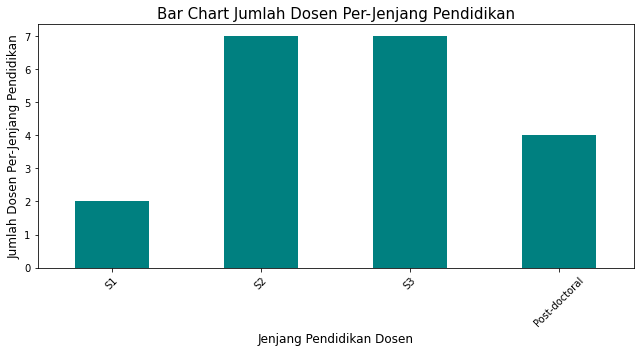

In [4]:
#penggunaan library matplotlib untuk visualisasi
import matplotlib.pyplot as plt

JumlahDosen = dfs["Jenjang Pendidikan Dosen"].value_counts()
UrutanDosen = ["S1", "S2", "S3", "Post-doctoral"]
JumlahDosen = JumlahDosen.loc[UrutanDosen]

#membuat bar chart
plt.figure(figsize = (9, 5))
JumlahDosen.plot(kind = "bar", color = "teal")
plt.title("Bar Chart Jumlah Dosen Per-Jenjang Pendidikan", fontsize = 15)
plt.xlabel("Jenjang Pendidikan Dosen", fontsize = 12)
plt.ylabel("Jumlah Dosen Per-Jenjang Pendidikan", fontsize = 12)
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(False)

#visualisasi bar chart
plt.tight_layout()

plt.show()

Visualisasi Line Chart Untuk Menunjukkan Usia Rata-Rata Dosen Di Jenjang Pendidikan Tertentu

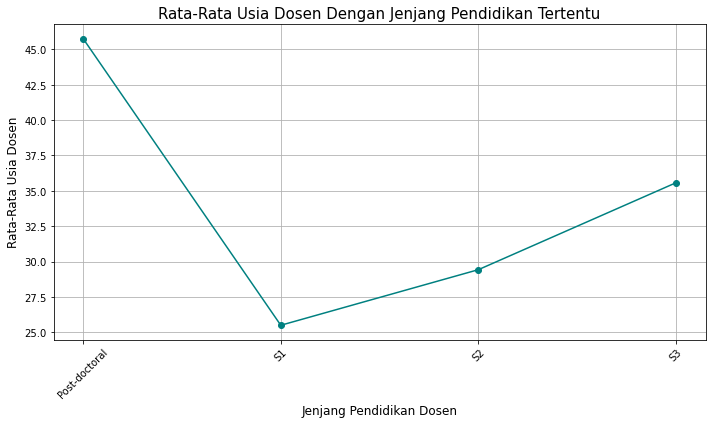

In [5]:
#penggunaan library matplotlib untuk visualisasi
import matplotlib.pyplot as plt

#menghitung rata-rata usia untuk setiap jenjang pendidikan
UsiaPerjenjang = dfs.groupby("Jenjang Pendidikan Dosen")["Usia Dosen"].mean()
UrutanDosen = ["S1", "S2", "S3", "Post-doctoral"]
JumlahDosen = UsiaPerjenjang.loc[UrutanDosen]

#usia rata-rata sebagai sumbu x
Jenjang = UsiaPerjenjang.index

#usia rata-rata sebagai sumbu y
UsiaDosen = UsiaPerjenjang.values

#visualisasi line chart
plt.figure(figsize = (10, 6))
plt.plot(Jenjang, UsiaDosen, color = "teal", marker = "o", linestyle = "-")

plt.title("Rata-Rata Usia Dosen Dengan Jenjang Pendidikan Tertentu", fontsize = 15)
plt.xlabel("Jenjang Pendidikan Dosen", fontsize = 12)
plt.ylabel("Rata-Rata Usia Dosen", fontsize = 12)
plt.grid(True)
plt.xticks(rotation = 45)
plt.tight_layout()

plt.show()

Visualisasi Pie Chart Untuk Mengetahui Berapa Banyak Proporsi Per-Jenjang Pendidikan Dosen (S1, S2, S3, Dan Pos-doctoral)

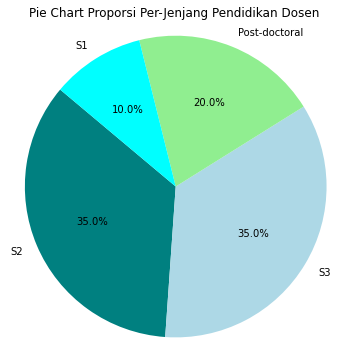

In [6]:
#penggunaan library matplotlib untuk visualisasi
import matplotlib.pyplot as plt

#perhitungan presentase dan pemberian warna pie chart untuk proporsi per-jenjang pendidikan dosen
JumlahDosen = dfs["Jenjang Pendidikan Dosen"].value_counts()
warna = ["teal", "lightblue", "lightgreen", "cyan", "blue"]
presentase = JumlahDosen / JumlahDosen.sum()

#visualisasi pie chart
plt.figure(figsize = (6, 6))
plt.pie(JumlahDosen.values, labels = JumlahDosen.index, autopct = "%1.1f%%", startangle = 140, colors = warna)
plt.title("Pie Chart Proporsi Per-Jenjang Pendidikan Dosen")
plt.axis("equal")

plt.show()

2. Daftar Pasien Diabetes Berdasarkan Faktor Gula Darah, Berat Badan, Dan Tinggi Badan

Pembuatan Data Frame Dari Data Yang Ada

In [1]:
#penggunaan library pandas untuk membuat dataframe
import pandas as pd

#penulisan data untuk data frame
DataPasienDiabetes = {"Nomor" : list(range(1, 21)),
                      "Tinggi Badan (Cm)": ["165", "150", "154", "149", "166", "156", "148", "154", "163", "152", "166",
                          "151", "150", "146", "163", "151", "146", "156", "160", "147"],
    "Berat Badan (Kg)": ["50", "95", "52", "43", "96", "67", "42", "64", "74", "98", "51", "96", "48", "40",
                         "93", "61", "40", "66", "71", "95"],
    "Gula Darah (Puasa)": ["4.9", "5.7", "4.5", "8.14", "8.05", "4.2", "8.14", "4.89", "5.08", "5.6", "4.7",
                           "5.8", "4.3", "8.19", "8.08", "4.3", "8.10", "4.92", "5.05", "5.3"]}

dfs = pd.DataFrame(DataPasienDiabetes)
print("Ditampilkan Data Frame Data Pasien Diabetes : ")
dfs

Ditampilkan Data Frame Data Pasien Diabetes : 


,Nomor,Tinggi Badan (Cm),Berat Badan (Kg),Gula Darah (Puasa)
0,1,165,50,4.9
1,2,150,95,5.7
2,3,154,52,4.5
3,4,149,43,8.14
4,5,166,96,8.05
5,6,156,67,4.2
6,7,148,42,8.14
7,8,154,64,4.89
8,9,163,74,5.08
9,10,152,98,5.6


Pengelompokkan Berat Badan Kurang (Underweight), Normal, Dan Berat Badan Berlebih (Overweight), Dan Berat Badan Sangat Berlebih (Obesitas) Menurut Perhitungan BMI

In [2]:
#menghitung kategori sesuai BMI
dfs["Tinggi Badan (M)"] = dfs["Tinggi Badan (Cm)"].astype(float) / 100
dfs["Berat Badan (Kg)"] = dfs["Berat Badan (Kg)"].astype(float)
dfs["BMI"] = dfs["Berat Badan (Kg)"] / (dfs["Tinggi Badan (M)"] ** 2)

#membuat kategori berat badan
def kategori_bb(bmi):
    if bmi < 18.5:
        return "Kurang (Underweight)"
    elif 18.5 <= bmi < 25:
        return "Normal"
    elif 25 <= bmi < 30:
        return "Berlebih (Overweight)"
    else:
        return "Sangat Berlebih (Obesitas)"

#membuat kolom baru pada data frame
dfs["Kategori Berat Badan"] = dfs["BMI"].apply(kategori_bb)

#menghapus kolom yang tidak di perlukan
dfs = dfs.drop(["Tinggi Badan (M)"], axis = 1)
dfs

,Nomor,Tinggi Badan (Cm),Berat Badan (Kg),Gula Darah (Puasa),BMI,Kategori Berat Badan
0,1,165,50.0,4.9,18.365473,Kurang (Underweight)
1,2,150,95.0,5.7,42.222222,Sangat Berlebih (Obesitas)
2,3,154,52.0,4.5,21.926126,Normal
3,4,149,43.0,8.14,19.368497,Normal
4,5,166,96.0,8.05,34.838148,Sangat Berlebih (Obesitas)
5,6,156,67.0,4.2,27.531229,Berlebih (Overweight)
6,7,148,42.0,8.14,19.174580,Normal
7,8,154,64.0,4.89,26.986001,Berlebih (Overweight)
8,9,163,74.0,5.08,27.852008,Berlebih (Overweight)
9,10,152,98.0,5.6,42.416898,Sangat Berlebih (Obesitas)


Pengelompokkan Gula Darah Dengan Kategori Normal, Prediabetes, Dan Diabetes Di Pembuatan Kolom Baru

In [3]:
#membuat kategori gula darah
def kategori_gula(gd):
    gd_float = float(gd)
    if gd_float < 5.6:
        return "Normal"
    elif 5.6 <= gd_float < 6.9:
        return "Prediabetes"
    else:
        return "Diabetes"

#membuat kolom baru pada data frame
dfs["Kategori Gula Darah"] = dfs["Gula Darah (Puasa)"].apply(kategori_gula)
dfs

,Nomor,Tinggi Badan (Cm),Berat Badan (Kg),Gula Darah (Puasa),BMI,Kategori Berat Badan,Kategori Gula Darah
0,1,165,50.0,4.9,18.365473,Kurang (Underweight),Normal
1,2,150,95.0,5.7,42.222222,Sangat Berlebih (Obesitas),Prediabetes
2,3,154,52.0,4.5,21.926126,Normal,Normal
3,4,149,43.0,8.14,19.368497,Normal,Diabetes
4,5,166,96.0,8.05,34.838148,Sangat Berlebih (Obesitas),Diabetes
5,6,156,67.0,4.2,27.531229,Berlebih (Overweight),Normal
6,7,148,42.0,8.14,19.174580,Normal,Diabetes
7,8,154,64.0,4.89,26.986001,Berlebih (Overweight),Normal
8,9,163,74.0,5.08,27.852008,Berlebih (Overweight),Normal
9,10,152,98.0,5.6,42.416898,Sangat Berlebih (Obesitas),Prediabetes


Visualisasi Bar Chart Untuk Mengetahui Banyaknya Jumlah Pasien Pada Kategori Berat Badan Dan Kategori Gula Darah

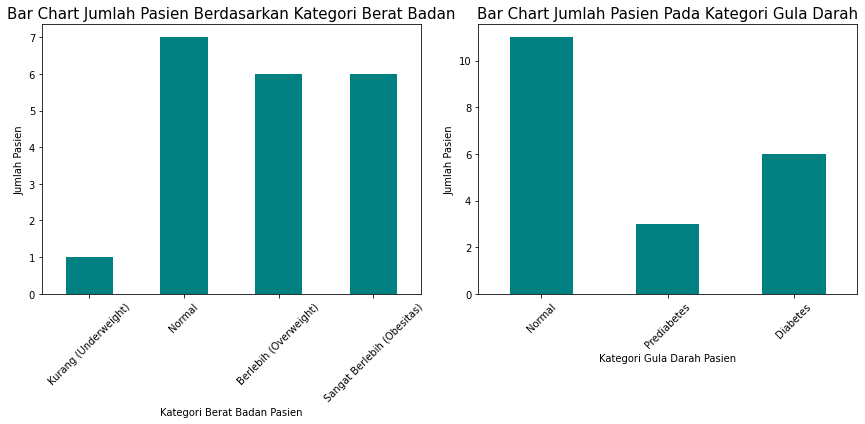

In [4]:
#penggunaan library matplotlib untuk visualisasi
import matplotlib.pyplot as plt

#jumlah setiap kategori berat badan
JumlahKategoriBB = dfs["Kategori Berat Badan"].value_counts().sort_index()
UrutanBB = ["Kurang (Underweight)", "Normal", "Berlebih (Overweight)", "Sangat Berlebih (Obesitas)"]
JumlahKategoriBB = JumlahKategoriBB.loc[UrutanBB]

#jumlah setiap kategori gula darah
JumlahKategoriGD = dfs["Kategori Gula Darah"].value_counts().sort_index()
UrutanGD = ["Normal", "Prediabetes", "Diabetes"]
JumlahKategoriGD = JumlahKategoriGD.loc[UrutanGD]

#membuat dua subplot
plt.figure(figsize = (12, 6))

#bar chart kategoti berat badan
plt.subplot(1, 2, 1)
JumlahKategoriBB.plot(kind = "bar", color = "teal")
plt.title("Bar Chart Jumlah Pasien Berdasarkan Kategori Berat Badan", fontsize=15)
plt.xlabel("Kategori Berat Badan Pasien")
plt.ylabel("Jumlah Pasien")
plt.xticks(rotation = 45, fontsize = 10)
plt.grid(False)

#bar chart kategori gula darah
plt.subplot(1, 2, 2)
JumlahKategoriGD.plot(kind = "bar", color = "teal")
plt.title("Bar Chart Jumlah Pasien Pada Kategori Gula Darah", fontsize = 15)
plt.xlabel("Kategori Gula Darah Pasien")
plt.ylabel("Jumlah Pasien")
plt.xticks(rotation = 45, fontsize = 10)
plt.grid(False)

plt.tight_layout()
plt.show()

Visualisasi Pie Chart Untuk Melihat Proporsi Masing-Masing Kategori Berat Badan Dan Kategori Gula Darah

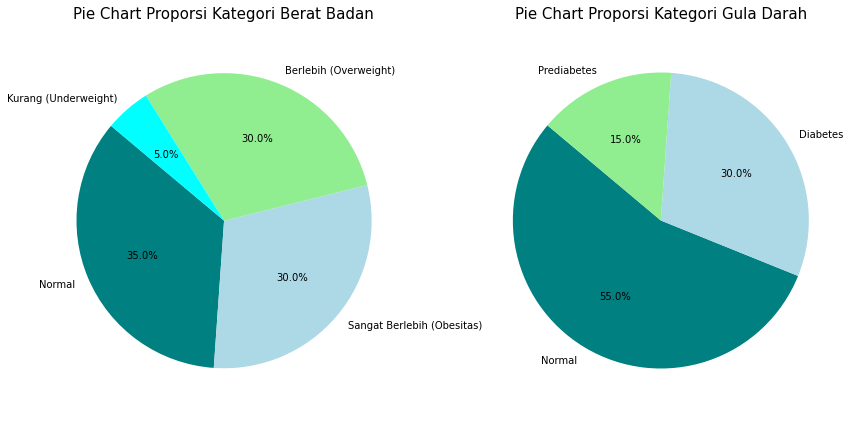

In [5]:
#penggunaan library matplotlib untuk visualisasi
import matplotlib.pyplot as plt

#perhitungan presentase dan pembuatan warna pie chart kategori berat badan
JumlahKategoriBB = dfs["Kategori Berat Badan"].value_counts()
WarnaBB = ["teal", "lightblue", "lightgreen", "cyan", "blue"]
presentase = JumlahKategoriBB / JumlahKategoriBB.sum()

#perhitungan presentase dan pembuatan warna pie chart untuk kategori gula darah
JumlahKategoriGD = dfs["Kategori Gula Darah"].value_counts()
WarnaGD = ["teal", "lightblue", "lightgreen", "cyan", "blue"]
presentase = JumlahKategoriGD / JumlahKategoriGD.sum()

#membuat dua subplot
plt.figure(figsize = (12, 6))

#pie chart untuk proporsi kategori berat badan
plt.subplot(1, 2, 1)
plt.pie(JumlahKategoriBB.values, labels = JumlahKategoriBB.index, autopct = "%1.1f%%", startangle = 140, colors = WarnaBB)
plt.title("Pie Chart Proporsi Kategori Berat Badan", fontsize = 15)
plt.axis("equal")

#pie chart untuk proporsi kategori berat badan
plt.subplot(1, 2, 2)
plt.pie(JumlahKategoriGD.values, labels = JumlahKategoriGD.index, autopct = "%1.1f%%", startangle = 140, colors = WarnaGD)
plt.title("Pie Chart Proporsi Kategori Gula Darah", fontsize = 15)
plt.axis("equal")

plt.tight_layout()
plt.show()

Visualisasi Scatter Plot Untuk Kolom BMI Dan Kolom Gula Darah Untuk Melihat Apakah Keduanya Memiliki Korelasi (Hubungan)

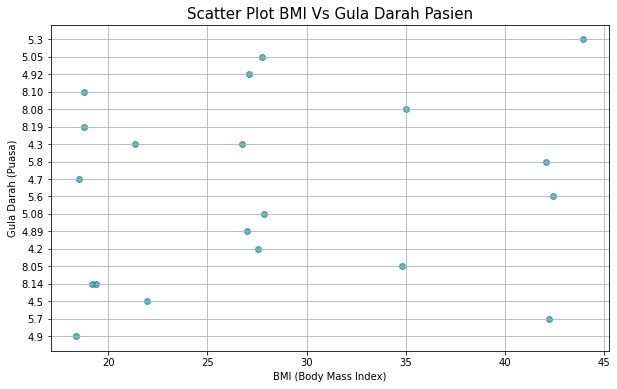

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Visualisasi scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(dfs["BMI"], dfs["Gula Darah (Puasa)"], color = "teal", alpha = 0.6)
plt.title("Scatter Plot BMI Vs Gula Darah Pasien", fontsize = 15)
plt.xlabel("BMI (Body Mass Index)", fontsize = 10)
plt.ylabel("Gula Darah (Puasa)", fontsize = 10)
plt.grid(True)

plt.show()

3. Daftar Kasus Pasien Terkonfirmasi Covid-19 Harian

Melakukan Pembuatan Data Frame Dari Data Yang Ada

In [1]:
#penggunaan library pandas untuk membuat data frame
import pandas as pd

#penulisan data untuk data frame
DataPasienCovid = {"Nomor" : list(range(1, 31)),
                   "Tanggal" : ["02-Mar-20", "03-Mar-20", "04-Mar-20", "05-Mar-20", "06-Mar-20", "07-Mar-20", "08-Mar-20", 
                                "09-Mar-20", "10-Mar-20", "11-Mar-20", "12-Mar-20", "13-Mar-20", "14-Mar-20", "15-Mar-20", 
                                "16-Mar-20", "17-Mar-20", "18-Mar-20", "19-Mar-20", "20-Mar-20", "21-Mar-20", "22-Mar-20", 
                                "23-Mar-20", "24-Mar-20", "25-Mar-20", "26-Mar-20", "27-Mar-20", "28-Mar-20", "29-Mar-20", 
                                "30-Mar-20", "31-Mar-20"],
                   "Jumlah Kasus Terkonfirmasi" : ["2", "0", "0", "0", "2", "0", "2", "13", "8", "7", "0", "35", "27", "21", 
                                                   "17", "38", "55", "82", "60", "81", "64", "65", "106", "105", "103", "153", 
                                                   "109", "130", "129", "114"]}

dfs = pd.DataFrame(DataPasienCovid)
print("Ditampilkan Data Frame Data Pasien Kasus Covid-19 : ")
dfs

Ditampilkan Data Frame Data Pasien Kasus Covid-19 : 


,Nomor,Tanggal,Jumlah Kasus Terkonfirmasi
0,1,02-Mar-20,2
1,2,03-Mar-20,0
2,3,04-Mar-20,0
3,4,05-Mar-20,0
4,5,06-Mar-20,2
5,6,07-Mar-20,0
6,7,08-Mar-20,2
7,8,09-Mar-20,13
8,9,10-Mar-20,8
9,10,11-Mar-20,7


Melakukan Perhitungan Pertumbuhan Kasus Covid-19 Harian

In [2]:
PertumbuhanHarian = [int(dfs["Jumlah Kasus Terkonfirmasi"][0])]
for k in range(1, len(dfs)):
    #perhitungan pertumbuhan harian dengan mengurangkan nilai indeks dari kolom jumlah kasus terkonfirmasi sekarang - sebelumnya
    PertumbuhanHarian.append(int(dfs["Jumlah Kasus Terkonfirmasi"][k]) - int(dfs["Jumlah Kasus Terkonfirmasi"][k - 1]))

dfs["Pertumbuhan Harian Kasus Covid-19"] = PertumbuhanHarian

print("Di Tampilkan Data Frame Dengan Pertumbuhan Harian Covid-19 : ")
dfs

Di Tampilkan Data Frame Dengan Pertumbuhan Harian Covid-19 : 


,Nomor,Tanggal,Jumlah Kasus Terkonfirmasi,Pertumbuhan Harian Kasus Covid-19
0,1,02-Mar-20,2,2
1,2,03-Mar-20,0,-2
2,3,04-Mar-20,0,0
3,4,05-Mar-20,0,0
4,5,06-Mar-20,2,2
5,6,07-Mar-20,0,-2
6,7,08-Mar-20,2,2
7,8,09-Mar-20,13,11
8,9,10-Mar-20,8,-5
9,10,11-Mar-20,7,-1


Melakukan Visualisasi Line Chart (Diagram Garis) Untuk Daftar Kasus Pasien Terkonfirmasi Covid-19

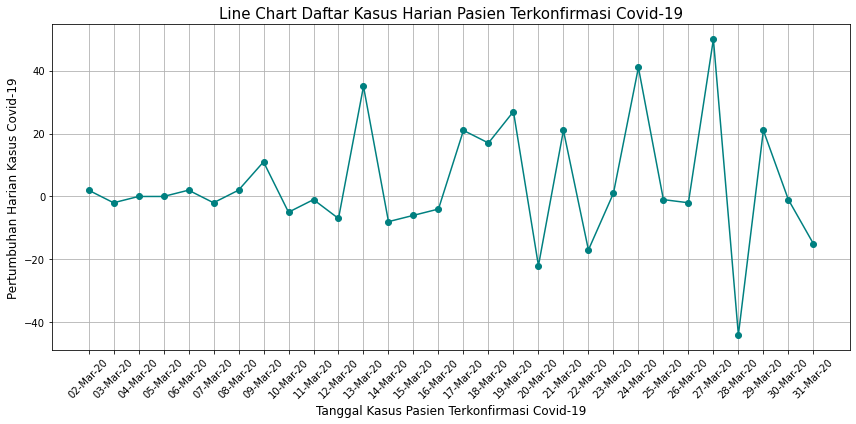

In [3]:
#penggunaan library matplotlib untuk visualisasi
import matplotlib.pyplot as plt

#visualisasi line chart
plt.figure(figsize = (12, 6))
plt.plot(dfs["Tanggal"], dfs["Pertumbuhan Harian Kasus Covid-19"], marker = "o", color = "teal")
plt.title("Line Chart Daftar Kasus Harian Pasien Terkonfirmasi Covid-19", fontsize = 15)
plt.xlabel("Tanggal Kasus Pasien Terkonfirmasi Covid-19", fontsize = 12)
plt.ylabel("Pertumbuhan Harian Kasus Covid-19", fontsize = 12)
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True)
plt.tight_layout()

plt.show()

Visualisasi Scatter Plot Untuk Kolom Jumlah Kasus Terkonfirmasi Covid-19 Dan Pertumbuhan Harian Kasus Covid-19

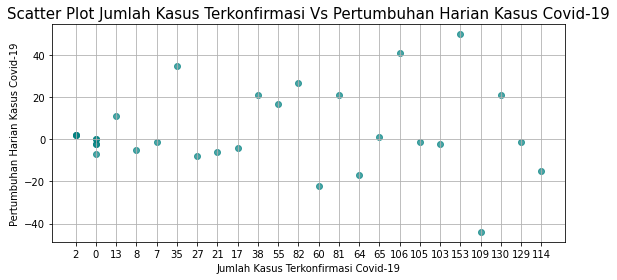

In [11]:
#penggunaan library matplotlib untuk visualisasi 
import matplotlib.pyplot as plt

#visualisasi scatter plot
plt.figure(figsize = (8, 4))
plt.scatter(dfs["Jumlah Kasus Terkonfirmasi"], dfs["Pertumbuhan Harian Kasus Covid-19"], color = "teal", alpha = 0.7)
plt.title("Scatter Plot Jumlah Kasus Terkonfirmasi Vs Pertumbuhan Harian Kasus Covid-19", fontsize = 15)
plt.xlabel("Jumlah Kasus Terkonfirmasi Covid-19", fontsize = 10)
plt.ylabel("Pertumbuhan Harian Kasus Covid-19", fontsize = 10)
plt.grid(True)
plt.tight_layout()

plt.show()